In [ ]:
pip install mplbasketball

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from IPython.display import display, Markdown
import matplotlib.colors as mcolors

In [2]:
# Display the full DataFrame without truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Guards

## Traditional

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Base",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        traditional_stats = pd.DataFrame(result_set, columns=headers)
        
        # Drop unnecessary columns
        columns_to_drop = [
            'Unnamed: 0', "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", 'GP', 'W', 'L', 'W_PCT', 'MIN', 
            'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK',
            'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'PTS_RANK',
            'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
            'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
            'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
            'PF_RANK', 'PFD_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
            'WNBA_FANTASY_PTS_RANK'
        ]
        traditional_stats = traditional_stats.drop(columns=[col for col in columns_to_drop if col in traditional_stats.columns])

        # Rename columns
        traditional_stats = traditional_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",        
            "TEAM_ABBREVIATION": "TEAM",
            "FG_PCT": "FG%",
            "FT_PCT": "FT%",
            "FG3M": "3PM",
            "FG3A": "3PA",
            "FG3_PCT": "3P%",
            "PLUS_MINUS": "+/-"
        })

        # Round the MIN column to one decimal point (if it exists)
        if "MIN" in traditional_stats.columns:
            traditional_stats["MIN"] = traditional_stats["MIN"].round(1)

        # Display the plain DataFrame (without any color coding or rank formatting)
        from IPython.display import display
        display(traditional_stats)

else:
    print(f"Request failed with status code {response.status_code}")

,PLAYER,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,+/-
0,A.J. Lawson,RAP,6.6,14.9,0.445,2.4,6.1,0.396,2.0,3.0,0.642,0.7,4.0,4.8,2.3,2.0,1.3,0.3,1.1,2.7,3.5,19.0,1.8
1,A.J. Reeves,BHM,1.2,3.5,0.343,0.8,2.5,0.320,0.3,0.4,0.750,0.4,1.2,1.6,1.0,0.4,0.0,0.1,0.3,1.0,0.4,3.6,-1.4
2,AJ Johnson,CCG,5.2,11.9,0.437,2.0,4.7,0.429,1.1,1.4,0.731,0.6,3.1,3.7,3.6,2.8,0.8,0.2,1.3,2.6,1.7,14.3,0.6
3,Aaron Estrada,MCC,3.7,8.2,0.450,1.3,4.0,0.324,0.4,0.5,0.750,0.9,2.2,3.2,3.5,2.1,0.6,0.1,0.4,0.9,0.6,9.2,0.2
4,Ade Murkey,WIS,2.6,7.0,0.368,1.2,3.8,0.315,0.6,0.7,0.786,0.6,1.4,2.0,1.5,0.8,1.2,0.5,0.4,1.7,1.3,7.5,-0.2
5,Alex Ducas,OKL,1.5,7.0,0.214,1.0,5.0,0.200,1.0,1.0,1.000,0.0,2.0,2.0,0.5,1.0,1.0,0.0,0.5,0.5,1.0,5.5,-10.5
6,Alex Gil-Fernandez,SCW,1.0,2.0,0.500,0.8,1.4,0.571,0.4,0.6,0.667,1.2,0.6,1.8,1.0,0.6,0.6,0.4,0.4,1.8,0.6,3.4,-0.2
7,Alex Morales,OSC,3.4,7.2,0.477,0.7,2.4,0.279,0.6,0.9,0.647,1.6,3.7,5.3,3.5,2.1,1.7,0.4,0.8,2.1,1.5,8.7,3.4
8,Alex O'Connell,WES,3.5,7.8,0.444,1.4,4.3,0.330,0.3,0.4,0.667,1.5,2.6,4.1,1.5,1.1,0.6,0.3,0.4,1.1,0.6,8.8,-3.8
9,Alex Schumacher,WCB,3.1,8.2,0.381,0.5,2.8,0.194,0.8,0.9,0.905,0.7,1.8,2.5,3.0,2.1,0.6,0.2,0.6,1.6,1.6,8.1,-5.8


## Advanced

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Advanced",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        advanced_stats = pd.DataFrame(result_set, columns=headers)

        # Columns to drop
        columns_to_drop = [
            "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", "GP", "W", "L", "W_PCT", 
            "E_OFF_RATING", "sp_work_OFF_RATING", "E_DEF_RATING", "sp_work_DEF_RATING", 
            "E_NET_RATING", "sp_work_NET_RATING", "E_TOV_PCT", "E_USG_PCT", 
            "E_PACE", "PACE_PER40", "sp_work_PACE", "POSS", "FGM", "FGA", 
            "FGM_PG", "FGA_PG", "FG_PCT", "GP_RANK", "W_RANK", "L_RANK", 
            "W_PCT_RANK", "MIN_RANK", "E_OFF_RATING_RANK", "OFF_RATING_RANK", 
            "sp_work_OFF_RATING_RANK", "E_DEF_RATING_RANK", "DEF_RATING_RANK", 
            "sp_work_DEF_RATING_RANK", "E_NET_RATING_RANK", "NET_RATING_RANK", 
            "sp_work_NET_RATING_RANK", "AST_PCT_RANK", "AST_TO_RANK", "AST_RATIO_RANK", 
            "OREB_PCT_RANK", "DREB_PCT_RANK", "REB_PCT_RANK", "TM_TOV_PCT_RANK", "E_TOV_PCT_RANK",
            "EFG_PCT_RANK", "TS_PCT_RANK", "USG_PCT_RANK", "E_USG_PCT_RANK", "E_PACE_RANK", 
            "PACE_RANK", "sp_work_PACE_RANK", "PIE_RANK", "FGM_RANK", "FGA_RANK", "FGM_PG_RANK",
            "FGA_PG_RANK", "FG_PCT_RANK"
        ]
        
        # Drop specified columns
        advanced_stats = advanced_stats.drop(columns=[col for col in columns_to_drop if col in advanced_stats.columns])

        # Rename columns
        advanced_stats = advanced_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",
            "TEAM_ABBREVIATION": "TEAM",
            "OFF_RATING": "OFFRTG",
            "DEF_RATING": "DEFRTG",
            "NET_RATING": "NETRTG",
            "AST_PCT": "AST%",
            "AST_TO": "AST/TO",
            "AST_RATIO": "AST RATIO",
            "OREB_PCT": "OREB%",
            "DREB_PCT": "DREB%",
            "REB_PCT": "REB%",
            "TM_TOV_PCT": "TO RATIO",
            "EFG_PCT": "EFG%",
            "TS_PCT": "TS%",
            "USG_PCT": "USG%"
        })

        # Round the MIN column to one decimal point
        if "MIN" in advanced_stats.columns:
            advanced_stats["MIN"] = advanced_stats["MIN"].round(1)

        # Display the styled DataFrame
        from IPython.display import display
        display(advanced_stats)

else:
    print(f"Request failed with status code {response.status_code}")

,PLAYER,TEAM,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,A.J. Lawson,RAP,31.8,111.2,109.4,1.8,0.105,1.16,10.5,0.022,0.121,0.072,9.1,0.526,0.586,0.246,104.62,0.095
1,A.J. Reeves,BHM,10.4,105.3,110.0,-4.7,0.135,2.50,19.6,0.036,0.095,0.067,7.8,0.457,0.490,0.160,104.73,0.052
2,AJ Johnson,CCG,28.6,110.9,109.9,1.0,0.190,1.28,18.3,0.021,0.097,0.061,14.3,0.521,0.570,0.235,100.21,0.081
3,Aaron Estrada,MCC,19.9,105.9,106.0,0.0,0.260,1.69,24.8,0.044,0.102,0.073,14.7,0.529,0.547,0.210,102.29,0.109
4,Ade Murkey,WIS,20.2,108.5,108.2,0.3,0.109,1.87,14.9,0.030,0.061,0.046,8.0,0.455,0.510,0.176,99.97,0.061
5,Alex Ducas,OKL,28.8,97.7,115.7,-18.1,0.024,0.50,5.6,0.000,0.060,0.031,11.1,0.286,0.370,0.117,106.61,0.016
6,Alex Gil-Fernandez,SCW,13.2,115.1,111.9,3.1,0.089,1.67,25.0,0.072,0.037,0.055,15.0,0.700,0.751,0.088,107.80,0.047
7,Alex Morales,OSC,29.4,113.1,107.2,5.9,0.151,1.70,26.0,0.053,0.108,0.082,15.3,0.523,0.567,0.137,102.23,0.082
8,Alex O'Connell,WES,22.4,107.8,115.8,-8.0,0.095,1.30,13.7,0.058,0.113,0.084,10.5,0.535,0.552,0.160,104.95,0.076
9,Alex Schumacher,WCB,22.7,98.5,110.2,-11.7,0.203,1.43,21.8,0.027,0.074,0.050,15.2,0.414,0.470,0.202,98.11,0.060


## Defense

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Defense",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        defense_stats = pd.DataFrame(result_set, columns=headers)

        # Columns to drop
        columns_to_drop = [
            "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", "GP", "W", "L", "W_PCT", "GP_RANK", "W_RANK", "L_RANK",
            "W_PCT_RANK", "MIN_RANK", "DEF_RATING_RANK", "DREB_RANK", 
            "DREB_PCT_RANK", "PCT_DREB_RANK", "STL_RANK", "PCT_STL_RANK",
            "BLK_RANK", "PCT_BLK_RANK", "OPP_PTS_OFF_TOV_RANK", 
            "OPP_PTS_2ND_CHANCE_RANK", "OPP_PTS_FB_RANK", "OPP_PTS_PAINT_RANK",
            "DEF_WS_RANK"
        ]

        # Drop specified columns
        defense_stats = defense_stats.drop(columns=[col for col in columns_to_drop if col in defense_stats.columns])

        # Rename columns
        defense_stats = defense_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",
            "TEAM_ABBREVIATION": "TEAM",
            "DEF_RATING": "DEF RTG",
            "DREB": "DREB",
            "DREB_PCT": "DREB%",
            "PCT_DREB": "%DREB",
            "STL": "STL",
            "PCT_STL": "STL%",
            "BLK": "BLK",
            "PCT_BLK": "%BLK",
            "OPP_PTS_OFF_TOV": "OPP PTS OFF TOV",
            "OPP_PTS_2ND_CHANCE": "OPP PTS 2ND CHANCE",
            "OPP_PTS_FB": "OPP PTS FB",
            "OPP_PTS_PAINT": "OPP PTS PAINT",
            "DEF_WS": "DEF WS"
        })

        # Round the MINUTES column to one decimal point
        if "MIN" in defense_stats.columns:
            defense_stats["MIN"] = defense_stats["MIN"].round(1)

       # Display the styled DataFrame
        from IPython.display import display
        display(defense_stats)

else:
    print(f"Request failed with status code {response.status_code}")

,PLAYER,TEAM,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT,DEF WS
0,A.J. Lawson,RAP,31.8,109.4,4.0,0.121,0.191,1.3,0.239,0.3,0.068,10.6,10.0,9.1,33.6,0.096
1,A.J. Reeves,BHM,10.4,110.0,1.2,0.095,0.158,0.0,0.000,0.1,0.111,5.1,3.7,4.2,11.4,0.031
2,AJ Johnson,CCG,28.6,109.9,3.1,0.097,0.155,0.8,0.157,0.2,0.048,9.9,10.8,7.2,30.0,0.080
3,Aaron Estrada,MCC,19.9,106.0,2.2,0.102,0.160,0.6,0.177,0.1,0.054,8.7,6.2,5.1,18.1,0.081
4,Ade Murkey,WIS,20.2,108.2,1.4,0.061,0.096,1.2,0.328,0.5,0.179,8.6,6.1,6.6,21.7,0.068
5,Alex Ducas,OKL,28.8,115.7,2.0,0.060,0.091,1.0,0.286,0.0,0.000,15.5,6.0,12.0,38.0,0.033
6,Alex Gil-Fernandez,SCW,13.2,111.9,0.6,0.037,0.056,0.6,0.300,0.4,0.400,4.2,4.8,5.8,13.2,0.031
7,Alex Morales,OSC,29.4,107.2,3.7,0.108,0.164,1.7,0.316,0.4,0.129,11.5,10.5,7.9,29.0,0.106
8,Alex O'Connell,WES,22.4,115.8,2.6,0.113,0.170,0.6,0.163,0.3,0.094,8.8,7.1,9.0,28.6,0.024
9,Alex Schumacher,WCB,22.7,110.2,1.8,0.074,0.128,0.6,0.165,0.2,0.058,11.0,9.2,8.9,23.7,0.062


## Shooting by Zone

In [6]:
import requests
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from IPython.display import display

#############################################
# 1. Get Shot Locations (MeasureType: Base) #
#############################################

url_base = "https://stats.gleague.nba.com/stats/leaguedashplayershotlocations"

headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

params_base = {
    "MeasureType": "Base",
    "PerMode": "PerGame",
    "PlusMinus": "N",
    "PaceAdjust": "N",
    "Rank": "N",
    "LeagueID": "20",
    "Season": "2024-25",
    "SeasonType": "Regular Season",
    "PORound": 0,
    "Outcome": "",
    "Location": "",
    "Month": 0,
    "SeasonSegment": "",
    "DateFrom": "",
    "DateTo": "",
    "OpponentTeamID": 0,
    "VsConference": "",
    "VsDivision": "",
    "TeamID": 0,
    "Conference": "",
    "Division": "",
    "GameSegment": "",
    "Period": 0,
    "ShotClockRange": "",
    "LastNGames": 0,
    "DistanceRange": "By Zone",
    "GameScope": "",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "StarterBench": "",
    "DraftYear": "",
    "DraftPick": "",
    "College": "",
    "Country": "",
    "Height": "",
    "Weight": "",
    "ISTRound": ""
}

response_base = requests.get(url_base, headers=headers, params=params_base)

if response_base.status_code == 200:
    data_base = response_base.json()
    if "resultSets" in data_base and "rowSet" in data_base["resultSets"]:
        result_set = data_base["resultSets"]["rowSet"]
        headers_data = data_base["resultSets"]["headers"]
        
        # Get the bottom and top level column names
        bottom_level = headers_data[1]["columnNames"]
        top_level = headers_data[0]["columnNames"]
        
        # We'll use only a subset of the top-level zones:
        valid_top_levels = [
            "Restricted Area", 
            "In The Paint (Non-RA)", 
            "Mid-Range", 
            "Left Corner 3", 
            "Right Corner 3", 
            "Above the Break 3", 
            "Corner 3"
        ]
        valid_top_level_indices = [i for i, name in enumerate(top_level) if name in valid_top_levels]
        
        # Build a MultiIndex for the columns.
        general_columns = ["PLAYER_NAME", "TEAM_ABBREVIATION"]
        valid_general_columns = ["PLAYER", "TEAM"]  # renamed columns
        # Get indices for general columns from bottom_level, then for the shot stats.
        valid_lower_level_indices = [bottom_level.index(col) for col in general_columns] + [
            6 + i for i in range(len(bottom_level[6:])) if (i // 3) in valid_top_level_indices
        ]
        
        # Select only the valid columns
        filtered_bottom_level = [bottom_level[i] for i in valid_lower_level_indices]
        result_set_filtered = [[row[i] for i in valid_lower_level_indices] for row in result_set]
        
        # Adjust top-level names: first for the general columns, then for shot stats.
        top_level_adjusted = [" "] * len(general_columns) + [
            valid_top_levels[i // 3] for i in range(len(filtered_bottom_level) - len(general_columns))
        ]
        bottom_level_adjusted = valid_general_columns + [
            metric for i in range(len(valid_top_levels)) for metric in ["FGM", "FGA", "FG%"]
        ]
        
        multi_index = pd.MultiIndex.from_tuples(zip(top_level_adjusted, bottom_level_adjusted))
        shooting_stats = pd.DataFrame(result_set_filtered, columns=multi_index)
        
        # Convert numeric columns
        for col in shooting_stats.columns:
            if col not in [(" ", "PLAYER"), (" ", "TEAM")]:
                shooting_stats[col] = pd.to_numeric(shooting_stats[col], errors="coerce")
        
        # Rearrange columns: move "Left Corner 3" and "Right Corner 3" to the right of "Corner 3"
        column_order = (
            [col for col in shooting_stats.columns if col[0] not in ["Left Corner 3", "Right Corner 3"]] +
            [col for col in shooting_stats.columns if col[0] in ["Left Corner 3", "Right Corner 3"]]
        )
        shooting_stats = shooting_stats[column_order]
        
    else:
        print("No shot location data available.")
else:
    print(f"Request for shot locations failed with status code {response_base.status_code}")

# Flatten the MultiIndex columns for easier access.
shooting_stats_flat = shooting_stats.copy()
shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip()
    for col in shooting_stats.columns
]

#################################################
# 2. Get Defense Data to Extract the MIN Column  #
#################################################

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Defense",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        defense_stats = pd.DataFrame(result_set, columns=headers)

        # Columns to drop
        columns_to_drop = [
            "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", "GP", "W", "L", "W_PCT", "GP_RANK", "W_RANK", "L_RANK",
            "W_PCT_RANK", "MIN_RANK", "DEF_RATING_RANK", "DREB_RANK", 
            "DREB_PCT_RANK", "PCT_DREB_RANK", "STL_RANK", "PCT_STL_RANK",
            "BLK_RANK", "PCT_BLK_RANK", "OPP_PTS_OFF_TOV_RANK", 
            "OPP_PTS_2ND_CHANCE_RANK", "OPP_PTS_FB_RANK", "OPP_PTS_PAINT_RANK",
            "DEF_WS_RANK"
        ]

        # Drop specified columns
        defense_stats = defense_stats.drop(columns=[col for col in columns_to_drop if col in defense_stats.columns])

        # Rename columns
        defense_stats = defense_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",
            "TEAM_ABBREVIATION": "TEAM",
            "DEF_RATING": "DEF RTG",
            "DREB": "DREB",
            "DREB_PCT": "DREB%",
            "PCT_DREB": "%DREB",
            "STL": "STL",
            "PCT_STL": "STL%",
            "BLK": "BLK",
            "PCT_BLK": "%BLK",
            "OPP_PTS_OFF_TOV": "OPP PTS OFF TOV",
            "OPP_PTS_2ND_CHANCE": "OPP PTS 2ND CHANCE",
            "OPP_PTS_FB": "OPP PTS FB",
            "OPP_PTS_PAINT": "OPP PTS PAINT",
            "DEF_WS": "DEF WS"
        })

        # Round the MINUTES column to one decimal point
        if "MIN" in defense_stats.columns:
            defense_stats["MIN"] = defense_stats["MIN"].round(1)

# Extract the MIN column from defense_stats.
min_stats = defense_stats[["PLAYER", "MIN"]]

##########################################
# 3. Merge MIN column with Shot Locations#
##########################################

# Merge the MIN column with shooting_stats_flat based on the PLAYER name.
merged_stats = pd.merge(shooting_stats_flat, min_stats, on="PLAYER", how="left")

# Reorder columns so that the shot-location columns come first and MIN is appended.
shot_cols = list(shooting_stats_flat.columns)
merged_stats = merged_stats[shot_cols + ["MIN"]]

# Filter for players who played at least 15 minutes per game.
filtered_stats = merged_stats[merged_stats["MIN"] >= 15]

# Display the final DataFrame (shooting stats with MIN column)
display(filtered_stats)

,PLAYER,TEAM,Restricted Area FGM,Restricted Area FGA,Restricted Area FG%,In The Paint (Non-RA) FGM,In The Paint (Non-RA) FGA,In The Paint (Non-RA) FG%,Mid-Range FGM,Mid-Range FGA,Mid-Range FG%,Above the Break 3 FGM,Above the Break 3 FGA,Above the Break 3 FG%,Corner 3 FGM,Corner 3 FGA,Corner 3 FG%,Left Corner 3 FGM,Left Corner 3 FGA,Left Corner 3 FG%,Right Corner 3 FGM,Right Corner 3 FGA,Right Corner 3 FG%,MIN
0,A.J. Lawson,RAP,3.8,6.9,0.556,0.4,1.7,0.211,0.1,0.3,0.333,1.3,3.6,0.354,1.1,2.5,0.444,0.5,1.2,0.407,0.6,1.2,0.481,31.8
2,AJ Johnson,CCG,2.7,4.7,0.565,0.5,1.8,0.273,0.1,0.7,0.077,1.8,4.1,0.446,0.2,0.6,0.300,0.1,0.3,0.400,0.1,0.3,0.200,28.6
3,Aaron Estrada,MCC,1.2,1.4,0.870,0.9,1.9,0.500,0.3,1.1,0.294,0.9,3.0,0.314,0.4,1.0,0.353,0.2,0.5,0.444,0.1,0.5,0.250,19.9
4,Ade Murkey,WIS,1.0,1.7,0.576,0.3,1.3,0.240,0.1,0.1,0.500,0.8,2.5,0.333,0.4,1.3,0.280,0.3,0.8,0.357,0.1,0.6,0.182,20.2
5,Alex Ducas,OKL,0.0,0.5,0.000,0.5,1.5,0.333,0.0,0.0,0.000,0.5,3.0,0.167,0.5,2.0,0.250,0.5,1.5,0.333,0.0,0.5,0.000,28.8
7,Alex Morales,OSC,1.9,2.7,0.694,0.9,1.8,0.500,0.0,0.3,0.000,0.3,1.3,0.250,0.3,1.1,0.316,0.1,0.5,0.222,0.2,0.6,0.400,29.4
8,Alex O'Connell,WES,1.7,2.5,0.656,0.3,0.7,0.412,0.1,0.3,0.286,0.8,2.7,0.281,0.7,1.6,0.421,0.3,0.8,0.368,0.4,0.9,0.474,22.4
9,Alex Schumacher,WCB,1.3,2.4,0.561,0.9,2.0,0.438,0.4,1.0,0.360,0.5,2.3,0.196,0.1,0.5,0.182,0.0,0.3,0.000,0.1,0.2,0.500,22.7
10,Alondes Williams,SXF,3.7,5.6,0.659,0.9,2.4,0.358,0.2,0.5,0.500,1.4,4.0,0.348,0.4,0.9,0.450,0.1,0.5,0.300,0.3,0.5,0.600,33.8
12,Aminu Mohammed,DEL,2.7,5.0,0.542,0.6,1.6,0.359,0.0,0.0,0.000,0.0,0.3,0.000,0.1,0.2,0.500,0.0,0.1,0.500,0.0,0.1,0.500,22.1


## Opponent Shooting

In [7]:
import requests
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayershotlocations"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "MeasureType": "Opponent",
    "PerMode": "PerGame",
    "PlusMinus": "N",
    "PaceAdjust": "N",
    "Rank": "N",
    "LeagueID": "20",
    "Season": "2024-25",
    "SeasonType": "Regular Season",
    "PORound": 0,
    "Outcome": "",
    "Location": "",
    "Month": 0,
    "SeasonSegment": "",
    "DateFrom": "",
    "DateTo": "",
    "OpponentTeamID": 0,
    "VsConference": "",
    "VsDivision": "",
    "TeamID": 0,
    "Conference": "",
    "Division": "",
    "GameSegment": "",
    "Period": 0,
    "ShotClockRange": "",
    "LastNGames": 0,
    "DistanceRange": "By Zone",
    "GameScope": "",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "StarterBench": "",
    "DraftYear": "",
    "DraftPick": "",
    "College": "",
    "Country": "",
    "Height": "",
    "Weight": "",
    "ISTRound": ""
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()

    # Extract relevant data
    if "resultSets" in data and "rowSet" in data["resultSets"]:
        result_set = data["resultSets"]["rowSet"]
        headers = data["resultSets"]["headers"]

        # Extract bottom-level and top-level column names
        bottom_level = headers[1]["columnNames"]
        top_level = headers[0]["columnNames"]

        # Exclude the 'Backcourt' entry from the top-level columns
        valid_top_levels = [
            "Restricted Area", 
            "In The Paint (Non-RA)", 
            "Mid-Range", 
            "Left Corner 3", 
            "Right Corner 3", 
            "Above the Break 3", 
            "Corner 3"
        ]
        valid_top_level_indices = [i for i, name in enumerate(top_level) if name in valid_top_levels]

        # Build the MultiIndex for the columns
        general_columns = ["PLAYER_NAME", "TEAM_ABBREVIATION"]
        valid_general_columns = ["PLAYER", "TEAM"]  # Renamed columns
        valid_lower_level_indices = [bottom_level.index(col) for col in general_columns] + [
            6 + i for i in range(len(bottom_level[6:])) if (i // 3) in valid_top_level_indices
        ]

        # Select only the valid columns from the data
        filtered_bottom_level = [bottom_level[i] for i in valid_lower_level_indices]
        result_set_filtered = [[row[i] for i in valid_lower_level_indices] for row in result_set]

        # Adjust top-level column names for the valid FGM, FGA, FG% groups
        top_level = [" "] * len(general_columns) + [
            valid_top_levels[i // 3] for i in range(len(filtered_bottom_level) - len(general_columns))
        ]
        bottom_level = valid_general_columns + [
            metric for i in range(len(valid_top_levels)) for metric in ["FGM", "FGA", "FG%"]
        ]

        # Combine top and bottom levels into a MultiIndex
        multi_index = pd.MultiIndex.from_tuples(zip(top_level, bottom_level))
        opponent_shooting_stats = pd.DataFrame(result_set_filtered, columns=multi_index)

        # Convert all numeric columns explicitly
        for col in opponent_shooting_stats.columns:
            if col not in [(" ", "PLAYER"), (" ", "TEAM")]:
                opponent_shooting_stats[col] = pd.to_numeric(opponent_shooting_stats[col], errors="coerce")

        # Re-identify numeric columns
        numeric_cols = [col for col in opponent_shooting_stats.columns if col not in [(" ", "PLAYER"), (" ", "TEAM")]]

        # Rearrange columns: move "Left Corner 3" and "Right Corner 3" to the right of "Corner 3"
        column_order = (
            [col for col in opponent_shooting_stats.columns if col[0] not in ["Left Corner 3", "Right Corner 3"]] +
            [col for col in opponent_shooting_stats.columns if col[0] in ["Left Corner 3", "Right Corner 3"]]
        )
        opponent_shooting_stats = opponent_shooting_stats[column_order]

        # Display the styled DataFrame
        from IPython.display import display
        display(opponent_shooting_stats)

else:
    print(f"Request failed with status code {response.status_code}")

Restricted Area               \
                    PLAYER TEAM             FGM   FGA    FG%   
0              A.J. Lawson  RAP            12.0  18.7  0.643   
1              A.J. Reeves  BHM             4.8   6.9  0.696   
2               AJ Johnson  CCG            10.6  17.8  0.592   
3            Aaron Estrada  MCC             6.2  10.4  0.602   
4               Ade Murkey  WIS             8.1  12.7  0.632   
5               Alex Ducas  OKL            14.0  21.0  0.667   
6       Alex Gil-Fernandez  SCW             4.3   5.3  0.810   
7             Alex Morales  OSC             8.2  13.8  0.590   
8           Alex O'Connell  WES            10.5  16.3  0.646   
9          Alex Schumacher  WCB             9.0  16.1  0.558   
10        Alondes Williams  SXF            12.0  18.8  0.640   
11            Amari Bailey  IWA             9.5  13.0  0.731   
12          Aminu Mohammed  DEL             9.8  15.1  0.647   
13             Andrew Funk  GRG            10.0  15.0  0.669   
14           Antoine Davis  STO             3.6   6.1  0.592   
15          Antonio Reeves  BHM            17.1  28.4  0.603   
16         Armaan Franklin  CPS             6.6  10.8  0.611   
17       Baylor Scheierman  MNE            14.8  21.9  0.674   
18            Bones Hyland  IWA            17.0  23.5  0.723   
19            Boogie Ellis  STO            10.4  15.7  0.667   
20        Brandon Williams  TEX            15.0  22.0  0.682   
21          Brian Bowen II  STO             5.7   8.9  0.636   
22            Bronny James  SBL            10.6  16.6  0.638   
23          Bryce McGowens  RCR            13.3  19.4  0.687   
24           Bryson Warren  SXF            10.0  15.8  0.632   
25           Caleb Daniels  SXF             9.8  15.9  0.615   
26         Caleb McConnell  GBO             6.9  11.6  0.595   
27            Cam Christie  SDC            11.7  19.2  0.609   
28             Cam Spencer  MHU            16.8  22.3  0.753   
29          Cameron Parker  SCW             4.1   6.0  0.677   
30           Cameron Tyson  RCR             6.9  10.4  0.659   
31         Cassius Stanley  VAL             5.4   7.1  0.766   
32        Charles Matthews  MHU             2.6   4.3  0.600   
33       Charlie Brown Jr.  RAP             9.3  15.3  0.608   
34          Chasson Randle  STO             7.1  11.3  0.626   
35            Chris Martin  GBO             2.7   5.3  0.500   
36             Colby Jones  CCG            13.3  21.4  0.623   
37        Collin Gillespie  VAL             9.9  13.5  0.733   
38             Cormac Ryan  OKL             7.7  12.9  0.595   
39        Craig Porter Jr.  CLC            12.8  19.5  0.654   
40        Craig Randall II  RCR             9.2  14.4  0.639   
41             D.J. Carton  SDC             8.8  14.3  0.615   
42               DJ Rodman  MNE             8.3  13.4  0.618   
43              DJ Steward  MHU            12.7  18.3  0.694   
44           DaJuan Gordon  SBL             9.8  14.1  0.697   
45         Daeqwon Plowden  CPS            12.0  19.5  0.617   
46             Daishen Nix  RGV            12.9  21.2  0.610   
47          Dakota Mathias  IMA            13.0  20.7  0.629   
48            Damion Baugh  GBO            16.1  24.3  0.660   
49            Dane Goodwin  SLC             6.1   9.4  0.644   
50          Daniss Jenkins  MCC            10.8  16.8  0.642   
51         Dariq Whitehead  LIN            11.8  17.5  0.674   
52          David Duke Jr.  AUS             9.0  15.0  0.600   
53           David Johnson  MHU             8.3  12.2  0.685   
54         David Singleton  CPS             7.3  11.9  0.608   
55          David Stockton  VAL             7.4  10.5  0.704   
56              Davon Reed  BHM            12.7  20.9  0.606   
57          De'Vion Harmon  IMA             7.3  13.2  0.556   
58          Dereon Seabron  SLC             7.6  11.4  0.663   
59            Devin Carter  STO             6.0   9.0  0.667   
60             Devon Higgs  GBO             4.8   8.2  0.589   


# Pizza Plots

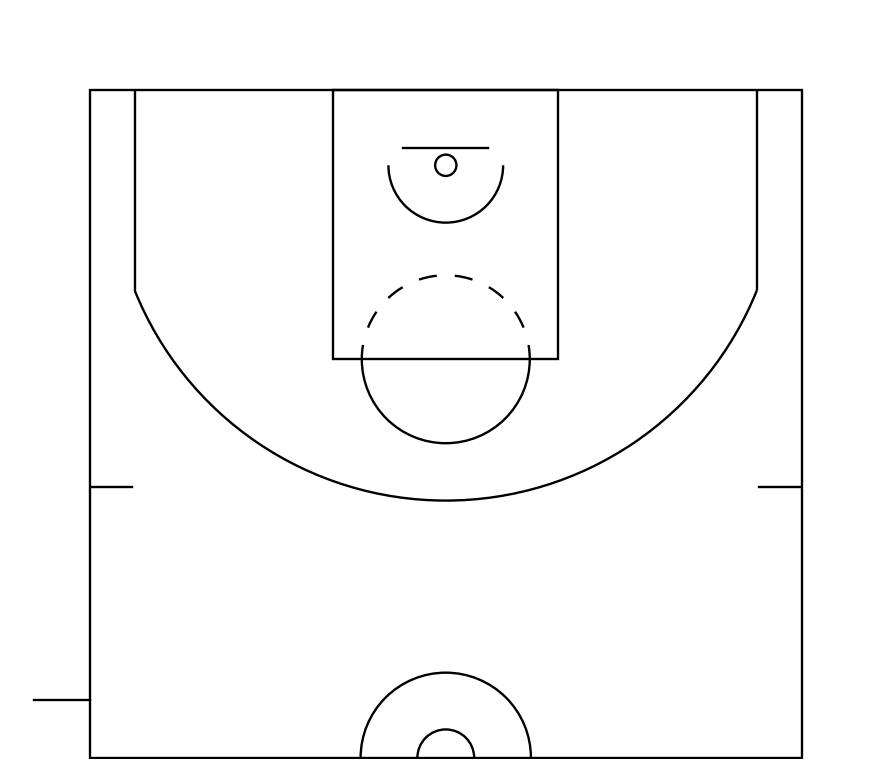

In [9]:
from mplbasketball import Court

court = Court(origin="top-left")
fig, ax = court.draw(orientation="vu")

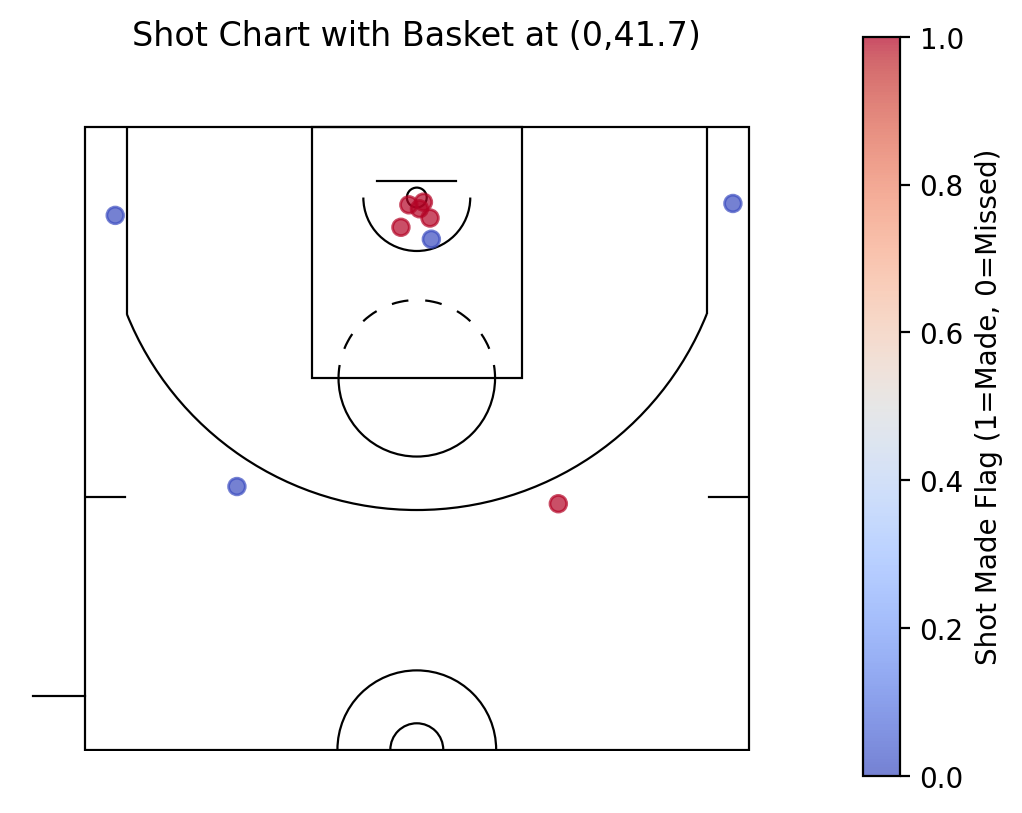

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.transforms as transforms

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344"
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- 1) Convert from tenths of a foot to feet
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# --- 2) (Optional) Flip Y if data is left-handed
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# --- 3) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# --- 4) Plot with mplbasketball
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap="coolwarm",
    alpha=0.7
)
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("Shot Chart with Basket at (0,41.7)")
plt.show()

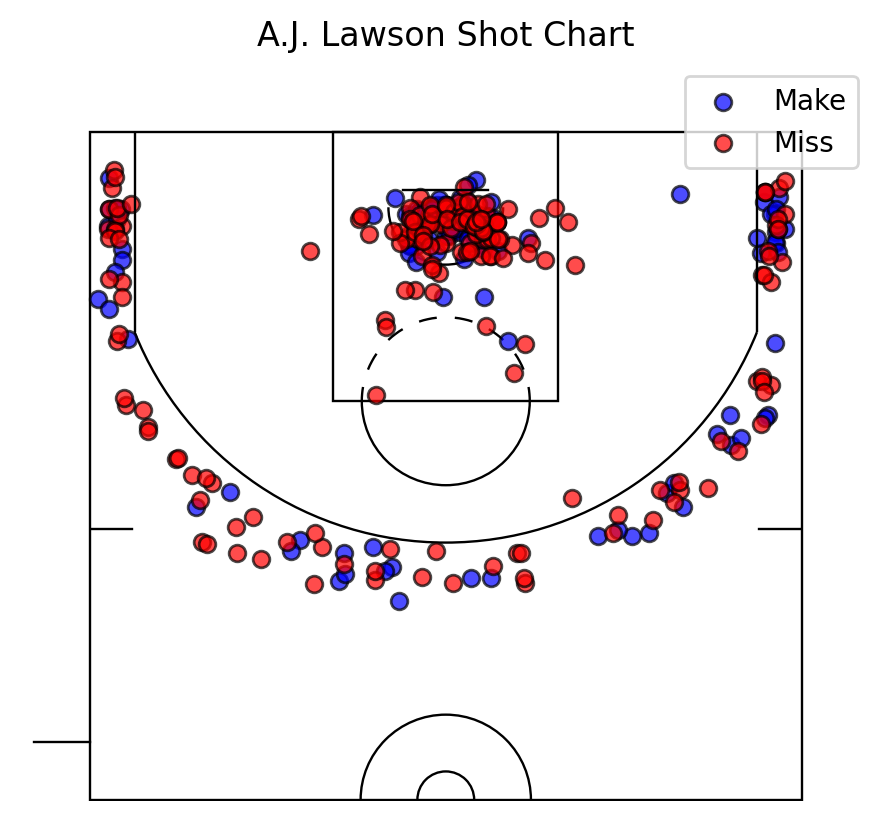

In [36]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA TO MATCH MPLBASKETBALL'S COORDINATES
# -------------------------------------------------------------------------
# 2a) Convert from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# 2b) Flip Y if data is left-handed (so y increases upward).
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# 2c) Shift the data so that the basket (originally at (0,0)) is at (0, 41.7).
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. PLOT THE SHOT DATA ON THE MPLBASKETBALL COURT WITH A CUSTOM LEGEND
# -------------------------------------------------------------------------
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

# Separate made and missed shots
df_made = all_shotchart_df[all_shotchart_df["SHOT_MADE_FLAG"] == 1]
df_missed = all_shotchart_df[all_shotchart_df["SHOT_MADE_FLAG"] == 0]

# Plot made shots as green circles
scatter_made = ax.scatter(
    df_made["x_plot"],
    df_made["y_plot"],
    color="blue",
    edgecolor="black",
    alpha=0.7,
    label="Make"
)

# Plot missed shots as red circles
scatter_missed = ax.scatter(
    df_missed["x_plot"],
    df_missed["y_plot"],
    color="red",
    edgecolor="black",
    alpha=0.7,
    label="Miss"
)

# Remove the colorbar and add a custom legend instead.
ax.legend(loc="upper right")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart")
plt.show()

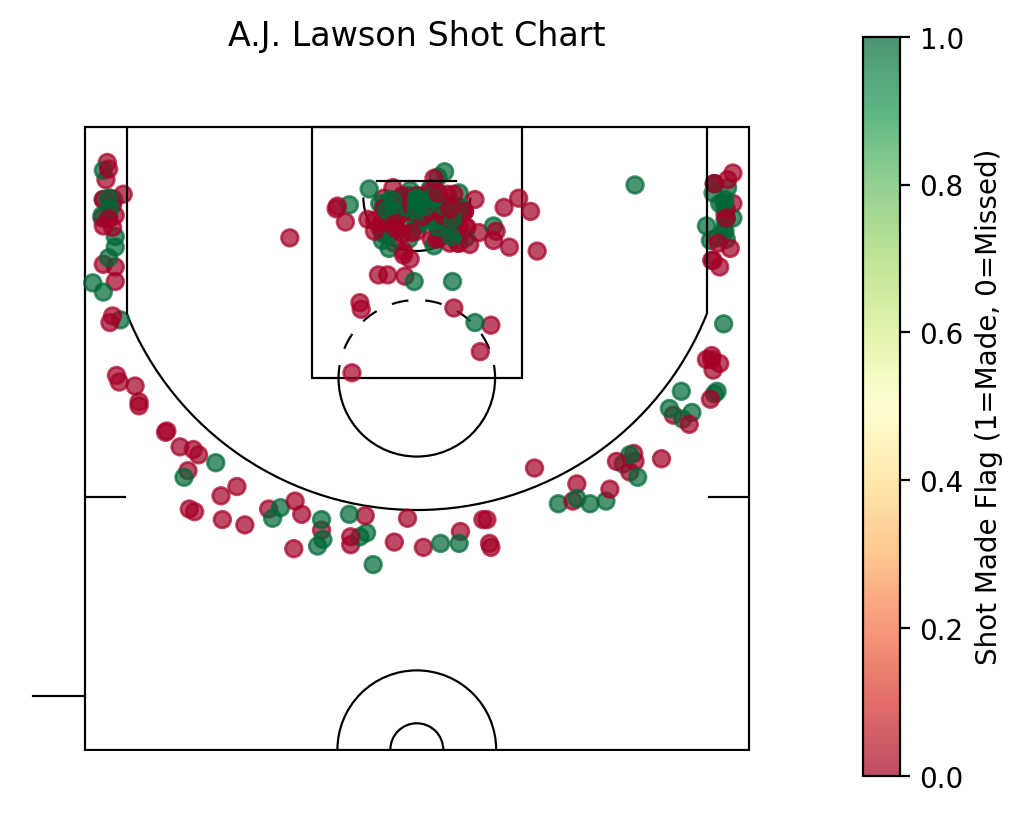

In [50]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.transforms as transforms

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- 1) Convert from tenths of a foot to feet
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# --- 2) (Optional) Flip Y if data is left-handed
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# --- 3) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# --- 4) Plot with mplbasketball
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap='RdYlGn', #Coolwarm
    alpha=0.7
)
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart")
plt.show()

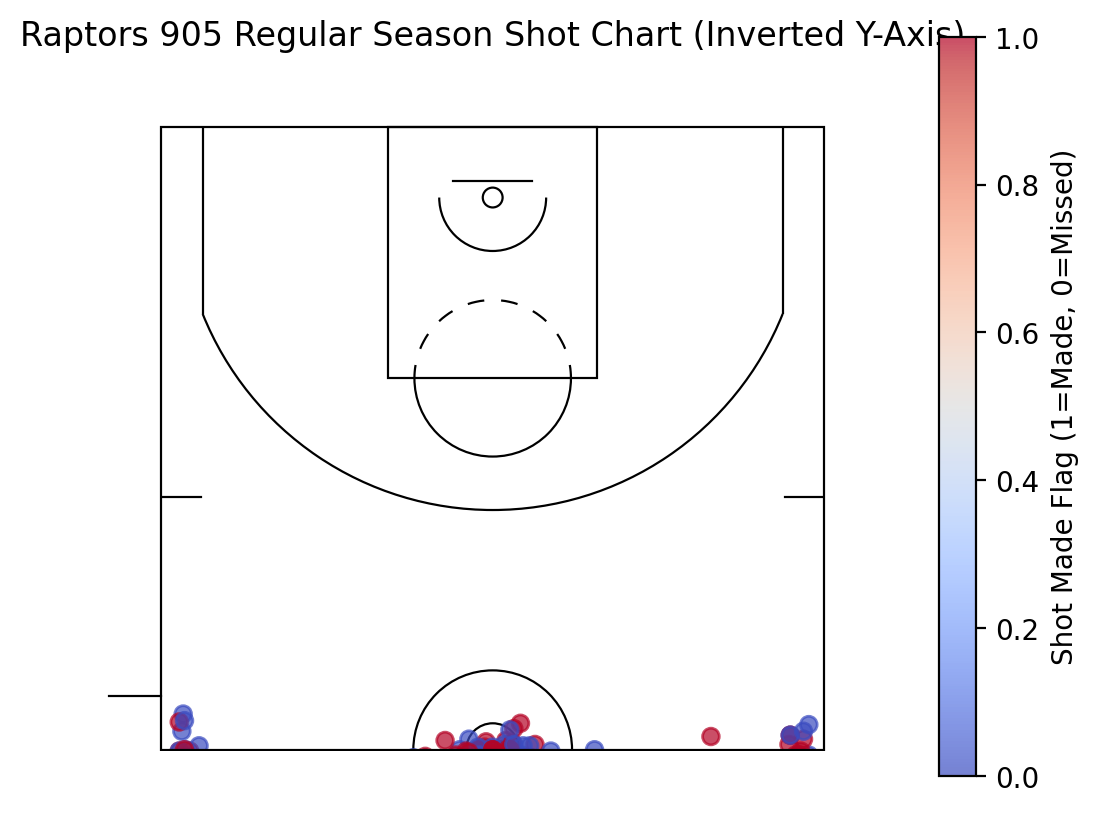

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court

# List of GameIDs for Raptors 905 regular season games.
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

# Define the API endpoint for shot chart details
url = "https://stats.gleague.nba.com/stats/shotchartdetail"

# Define headers (same as before)
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                   "AppleWebKit/537.36 (KHTML, like Gecko) "
                   "Chrome/91.0.4472.124 Safari/537.36"),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

# Base query parameters for the request (SeasonType is Regular Season)
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

# List to collect shot chart data for all games
all_shotchart_data = []

for game_id in game_ids:
    # Update the parameters with the current GameID
    params = base_params.copy()
    params["GameID"] = game_id

    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        # Create a DataFrame for the current game and tag with the GameID
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

# Combine all game DataFrames into one
if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- Coordinate Transformation ---
# Convert raw LOC_X and LOC_Y from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# Invert the y-axis to flip the coordinate system vertically.
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = -all_shotchart_df["y_ft"]

# --- Plotting with mplbasketball ---
# Draw a half-court using center origin and vertical up ("vu") orientation.
court = Court(origin="center")
fig, ax = court.draw(orientation="vu")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap="coolwarm",
    alpha=0.7
)

plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("Raptors 905 Regular Season Shot Chart (Inverted Y-Axis)")
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.show()

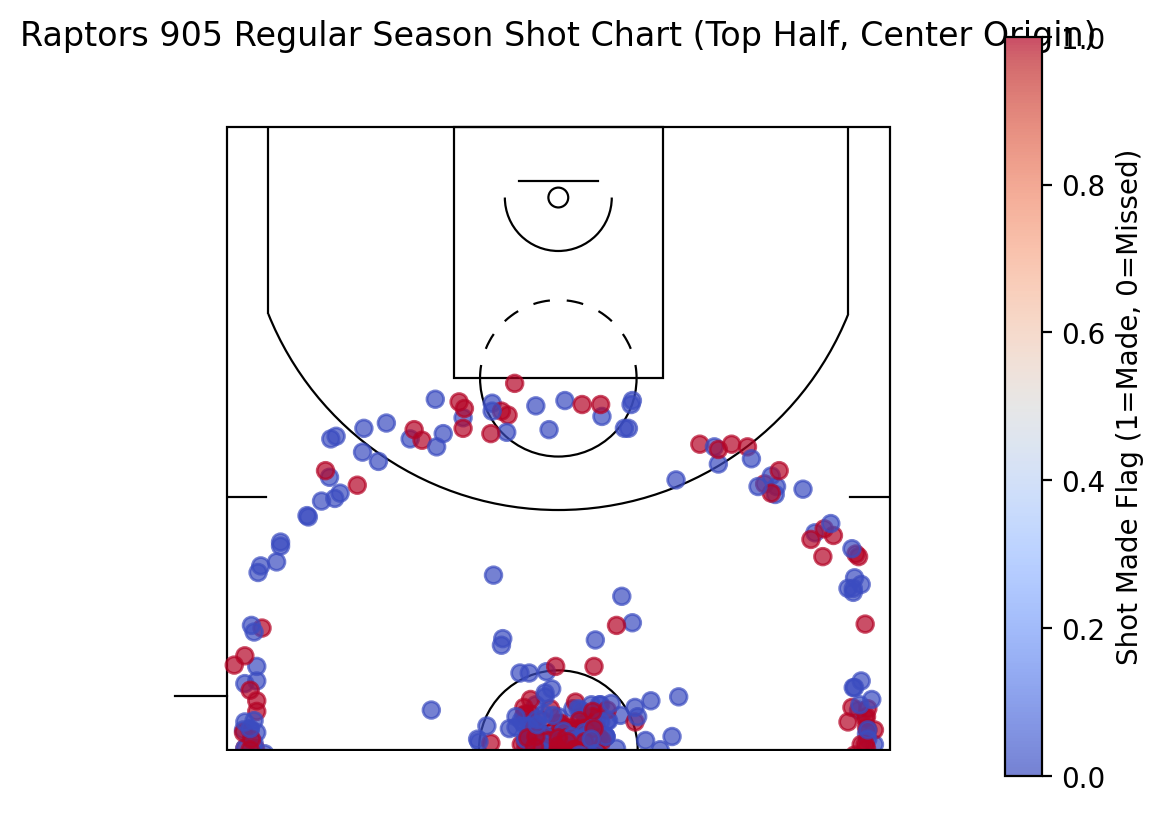

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court

# List of GameIDs for Raptors 905 regular season games.
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

# Define the API endpoint for shot chart details
url = "https://stats.gleague.nba.com/stats/shotchartdetail"

# Define headers (same as before)
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                   "AppleWebKit/537.36 (KHTML, like Gecko) "
                   "Chrome/91.0.4472.124 Safari/537.36"),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

# Base query parameters for the request (SeasonType is Regular Season)
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

# List to collect shot chart data for all games
all_shotchart_data = []

for game_id in game_ids:
    # Update the parameters with the current GameID
    params = base_params.copy()
    params["GameID"] = game_id

    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        # Create a DataFrame for the current game and tag with the GameID
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

# Combine all game DataFrames into one
if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- Coordinate Transformation ---
# Convert raw LOC_X and LOC_Y from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# Use the converted coordinates directly (no additional transformation)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"]

# --- Plotting with mplbasketball ---
# Draw a half-court using center origin and vertical up ("vu") orientation.
court = Court(origin="center")
fig, ax = court.draw(orientation="vu")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap="coolwarm",
    alpha=0.7
)

plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("Raptors 905 Regular Season Shot Chart (Top Half, Center Origin)")
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.show()

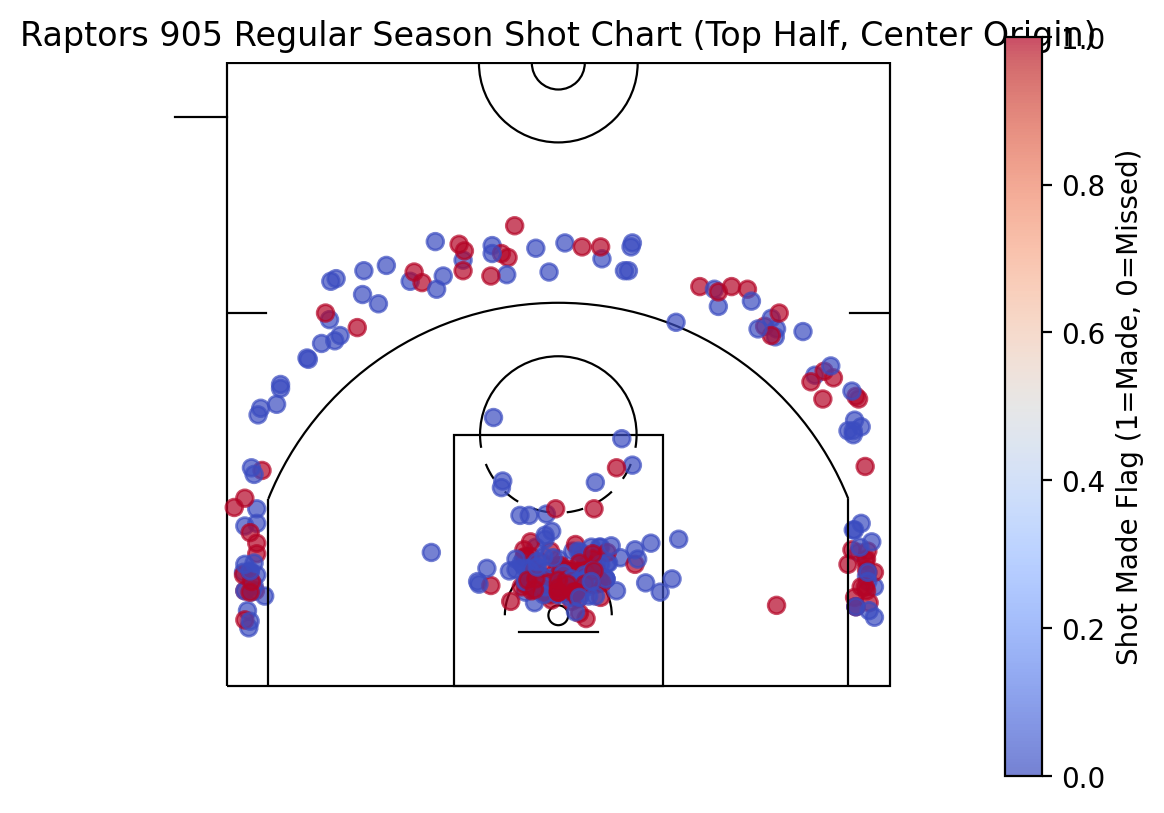

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court

# List of GameIDs for Raptors 905 regular season games.
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

# Define the API endpoint for shot chart details
url = "https://stats.gleague.nba.com/stats/shotchartdetail"

# Define headers (same as before)
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                   "AppleWebKit/537.36 (KHTML, like Gecko) "
                   "Chrome/91.0.4472.124 Safari/537.36"),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

# Base query parameters for the request (SeasonType is Regular Season)
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

# List to collect shot chart data for all games
all_shotchart_data = []

for game_id in game_ids:
    # Update the parameters with the current GameID
    params = base_params.copy()
    params["GameID"] = game_id

    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        # Create a DataFrame for the current game and tag with the GameID
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

# Combine all game DataFrames into one
if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- Coordinate Transformation ---
# Convert raw LOC_X and LOC_Y from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# Since your data are basket–centered (basket at (0,0))
# and we want to use a half-court with a center origin (with (0,0) at midcourt)
# for the top half (vertical up orientation), the top basket should be at (0,47).
# Therefore, add 47 to the y–values.
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] - 40

# --- Plotting with mplbasketball ---
# Draw a half-court using center origin and vertical up ("vu") orientation.
court = Court(origin="center")
fig, ax = court.draw(orientation="vd")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap="coolwarm",
    alpha=0.7
)

plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("Raptors 905 Regular Season Shot Chart (Top Half, Center Origin)")
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.show()

           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  PLAYER_NAME  \
0  Shot Chart Detail  2022400344             24    1630639  A.J. Lawson   
1  Shot Chart Detail  2022400344            120    1630639  A.J. Lawson   
2  Shot Chart Detail  2022400344            142    1630639  A.J. Lawson   
3  Shot Chart Detail  2022400344            147    1630639  A.J. Lawson   
4  Shot Chart Detail  2022400344            193    1630639  A.J. Lawson   

      TEAM_ID    TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  1612709920  Raptors 905       1                 10                 19   
1  1612709920  Raptors 905       1                  2                  1   
2  1612709920  Raptors 905       1                  0                 22   
3  1612709920  Raptors 905       1                  0                  2   
4  1612709920  Raptors 905       2                  9                 17   

    EVENT_TYPE                 ACTION_TYPE       SHOT_TYPE    SHOT_ZONE_BASIC  \
0  Missed S

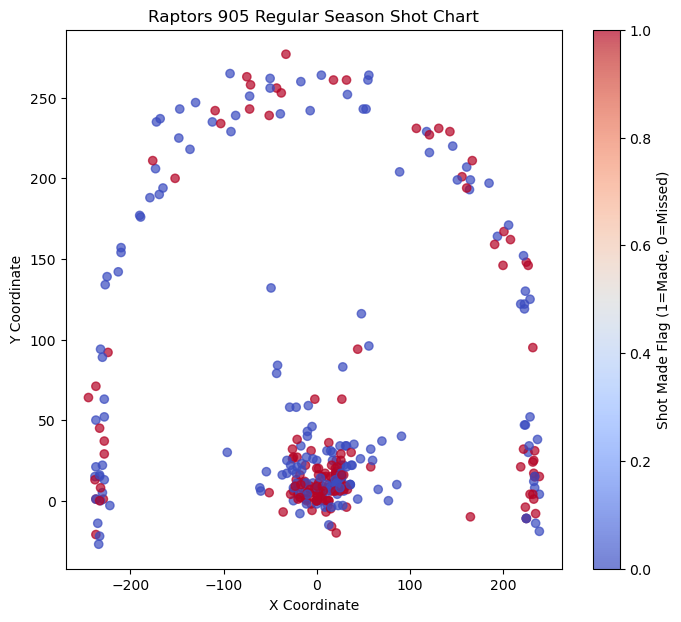

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# List of GameIDs for Raptors 905 regular season games.
# You can generate this list by scraping the team schedule or using an API endpoint that provides game logs.
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

# Define the API endpoint for shot chart details
url = "https://stats.gleague.nba.com/stats/shotchartdetail"

# Define headers (same as before)
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                   "AppleWebKit/537.36 (KHTML, like Gecko) "
                   "Chrome/91.0.4472.124 Safari/537.36"),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

# Base query parameters for the request (with SeasonType as Regular Season)
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

# List to collect shot chart data for all games
all_shotchart_data = []

for game_id in game_ids:
    # Update the parameters with the current GameID
    params = base_params.copy()
    params["GameID"] = game_id
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        # Create a DataFrame for the current game
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id  # Add a column to keep track of the GameID
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

# Combine all the individual game DataFrames into one
if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
    print(all_shotchart_df.head())
else:
    print("No data retrieved.")

# (Optional) Example: Visualize the shot locations from all games in a single plot
plt.figure(figsize=(8, 7))
plt.scatter(all_shotchart_df["LOC_X"], all_shotchart_df["LOC_Y"],
            c=all_shotchart_df["SHOT_MADE_FLAG"], cmap="coolwarm", alpha=0.7)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Raptors 905 Regular Season Shot Chart")
plt.colorbar(label="Shot Made Flag (1=Made, 0=Missed)")
plt.show()

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint for shot chart details
url = "https://stats.gleague.nba.com/stats/shotchartdetail"

# Define headers (similar to your previous example)
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                   "AppleWebKit/537.36 (KHTML, like Gecko) "
                   "Chrome/91.0.4472.124 Safari/537.36"),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

# Define the query parameters based on your provided details
params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameID": "2022400344",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    
    # Extract the shot chart details result set
    # Here we assume the first (and only) element in resultSets is what we need.
    shot_data = data["resultSets"][0]
    headers_list = shot_data["headers"]
    rows = shot_data["rowSet"]
    
    # Create a DataFrame using the headers and rowSet data
    shotchart_df = pd.DataFrame(rows, columns=headers_list)
    
    # Convert selected columns to numeric values (if needed)
    numeric_columns = [
        "PERIOD", "MINUTES_REMAINING", "SECONDS_REMAINING",
        "SHOT_DISTANCE", "LOC_X", "LOC_Y",
        "SHOT_ATTEMPTED_FLAG", "SHOT_MADE_FLAG"
    ]
    for col in numeric_columns:
        if col in shotchart_df.columns:
            shotchart_df[col] = pd.to_numeric(shotchart_df[col], errors="coerce")
    
    # Display the first few rows of the DataFrame
shotchart_df

# (Optional) Example: Visualize the shot locations from all games in a single plot
plt.figure(figsize=(8, 7))
plt.scatter(shotchart_df["LOC_X"], shotchart_df["LOC_Y"],
            c=shotchart_df["SHOT_MADE_FLAG"], cmap="coolwarm", alpha=0.7)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Raptors 905 Regular Season Shot Chart")
plt.colorbar(label="Shot Made Flag (1=Made, 0=Missed)")
plt.show()

## Shooting

In [ ]:
from mplbasketball import Court

court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(showaxis=True)

In [ ]:
import pandas as pd

# ---- Flatten the MultiIndex DataFrames for shooting stats ----

# For shooting_stats (MeasureType: Base)
shooting_stats_flat = filtered_stats.copy()
shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip() 
    for col in filtered_stats.columns
]

desired_shooting_cols = [
    "PLAYER", "MIN", 
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

shooting_df = filtered_stats[desired_shooting_cols]

shooting_df

In [ ]:
import scipy.stats as stats

# Define the list of column names (ordered as you want them in the pizza plot)
columns_to_plot = [
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

# Extract the stats for a given player
player_name = "A.J. Lawson"  # change this to the actual player's name
player_stats = shooting_df.loc[shooting_df["PLAYER"] == player_name]

# Compute the percentile for each stat (using the merged data as the reference)
values = []
percentiles = []
for col in columns_to_plot:
    # Get the value for the specific player
    value = player_stats[col].iloc[0]
    values.append(value)
    # Calculate the percentile based on the entire column distribution
    perc = int(stats.percentileofscore(shooting_df[col].dropna(), value))
    percentiles.append(perc)

print("Values:", values)
print("Percentiles:", percentiles)

In [ ]:
from mplsoccer import PyPizza, FontManager
import matplotlib.pyplot as plt

# Define names corresponding to each stat (this list should match the order in columns_to_plot)
stat_names = [
    "Restricted Area\nFGA", "Restricted Area\nFG%", 
    "In The Paint\n(Non-RA) FGA", "In The Paint\n(Non-RA) FG%",
    "Mid-Range\nFGA", "Mid-Range\nFG%",
    "Above the Break\n3 FGA", "Above the Break\n3 FG%",
    "Corner 3\nFGA", "Corner 3\nFG%",
]

slice_colors = ["orange"] * 4 + ["yellow"] * 2 + ["green"] * 4
text_colors = ["black"]*10

# Create a PyPizza object with your desired settings
baker = PyPizza(
    params=stat_names,
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

# Create the pizza plot using the computed percentiles
fig, ax = baker.make_pizza(
    percentiles,
    figsize=(10, 10),
    param_location=110,
    slice_colors=slice_colors,
    value_colors=text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
         va="center"
    ),
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

plt.show()

In [ ]:
# ---- Select desired columns from each DataFrame ----

desired_advanced_cols = [
    "PLAYER", "OFFRTG", "DEFRTG", "NETRTG", "AST/TO", 
    "OREB%", "DREB%", "REB%", "EFG%", "TS%", "USG%"
]

desired_defense_cols = [
    "PLAYER", "DEF WS"
]

desired_traditional_stats = ["PLAYER", "PTS"]

# Merge advanced_stats and defense_stats first
merged_df = pd.merge(advanced_stats[desired_advanced_cols], 
                     defense_stats[desired_defense_cols], 
                     on="PLAYER", how="outer")

### With Pace & Shooting

In [ ]:
import pandas as pd

# ---- Flatten the MultiIndex DataFrames for shooting stats ----

# For shooting_stats (MeasureType: Base)
shooting_stats_flat = shooting_stats.copy()
shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip() 
    for col in shooting_stats_flat.columns
]

desired_shooting_cols = [
    "PLAYER", 
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

# For opponent_shooting_stats (MeasureType: Opponent)
opponent_shooting_stats_flat = opponent_shooting_stats.copy()
opponent_shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip() 
    for col in opponent_shooting_stats_flat.columns
]

desired_opponent_shooting_cols = [
    "PLAYER", 
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

# ---- Select desired columns from each DataFrame ----

desired_advanced_cols = [
    "PLAYER", "OFFRTG", "DEFRTG", "NETRTG", "AST/TO", 
    "OREB%", "DREB%", "REB%", "EFG%", "TS%", "USG%"
]

desired_defense_cols = ["PLAYER", "DEF WS"]

# (If you wish to include other groups, add them here accordingly.)

# ---- Merge the DataFrames on the common "PLAYER" column ----

# Merge advanced_stats and defense_stats first
merged_df = pd.merge(advanced_stats[desired_advanced_cols], defense_stats[desired_defense_cols], on="PLAYER", how="outer")

# Merge with shooting_stats (Base)
merged_df = pd.merge(merged_df, shooting_stats_flat[desired_shooting_cols], on="PLAYER", how="outer")

# Merge with opponent_shooting_stats (Opponent)
merged_df = pd.merge(merged_df, opponent_shooting_stats_flat[desired_opponent_shooting_cols], on="PLAYER", how="outer")

# Display the merged DataFrame
print(merged_df.head())